# Telecom Customer Churn Prediction: Case Study Problem Statement

## Introduction

The telecom industry is highly competitive, and customer churn is a significant concern. Retaining existing customers is often more cost-effective than acquiring new ones. This case study aims to build a predictive model to identify customers who are likely to churn, allowing the company to take proactive measures to retain them.

# Objective

The primary objective is to develop a machine learning model that can predict customer churn with high accuracy. The model will use historical data to identify patterns or characteristics of customers who have churned in the past.

## Data

Two datasets are provided:

1. `train.csv`: This dataset contains historical data, including whether or not a customer has churned. Features include customerID, gender, SeniorCitizen, Partner, Dependents, tenure, PhoneService, MultipleLines, InternetService, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies, Contract, PaperlessBilling, PaymentMethod, MonthlyCharges, TotalCharges, and Churn.

2. `active_customers.csv`: This dataset contains data for active customers without the 'Churn' label. The objective is to predict the likelihood of these active customers churning in the near future.

# Data Exploration

1. Perform initial data exploration to understand the data types, missing values, and summary statistics.
2. Visualize the data to identify patterns and correlations.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('train.csv')
# df as dataframe

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,3704-IEAXF,Female,0,Yes,Yes,72,No,No phone service,DSL,No,...,No,Yes,Yes,Yes,Two year,No,Credit card (automatic),53.65,3784,0
1,5175-AOBHI,Female,0,No,No,4,Yes,No,DSL,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,46.00,193.6,1
2,6922-NCEDI,Male,0,No,Yes,56,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,21.20,1238.65,0
3,3143-ILDAL,Male,0,No,No,56,Yes,Yes,Fiber optic,No,...,No,Yes,No,Yes,Month-to-month,Yes,Electronic check,94.45,5124.6,1
4,0872-NXJYS,Female,0,No,No,9,Yes,No,Fiber optic,No,...,No,No,No,Yes,Month-to-month,Yes,Electronic check,79.55,723.4,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5282 entries, 0 to 5281
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        5282 non-null   object 
 1   gender            5282 non-null   object 
 2   SeniorCitizen     5282 non-null   int64  
 3   Partner           5282 non-null   object 
 4   Dependents        5282 non-null   object 
 5   tenure            5282 non-null   int64  
 6   PhoneService      5282 non-null   object 
 7   MultipleLines     5282 non-null   object 
 8   InternetService   5282 non-null   object 
 9   OnlineSecurity    5282 non-null   object 
 10  OnlineBackup      5282 non-null   object 
 11  DeviceProtection  5282 non-null   object 
 12  TechSupport       5282 non-null   object 
 13  StreamingTV       5282 non-null   object 
 14  StreamingMovies   5282 non-null   object 
 15  Contract          5282 non-null   object 
 16  PaperlessBilling  5282 non-null   object 


In [5]:
for column in df.columns :
    if df[column].dtype=='object' :
        print(column.upper(),': ',df[column].nunique())
        print(df[column].value_counts(normalize=True).sort_values())
        print('\n')

CUSTOMERID :  5282
customerID
3704-IEAXF    0.000189
3758-CKOQL    0.000189
8064-RAVOH    0.000189
2080-SRCDE    0.000189
7996-MHXLW    0.000189
                ...   
3594-BDSOA    0.000189
9068-FHQHD    0.000189
1334-FJSVR    0.000189
6143-JQKEA    0.000189
6490-FGZAT    0.000189
Name: proportion, Length: 5282, dtype: float64


GENDER :  2
gender
Female    0.496971
Male      0.503029
Name: proportion, dtype: float64


PARTNER :  2
Partner
Yes    0.479553
No     0.520447
Name: proportion, dtype: float64


DEPENDENTS :  2
Dependents
Yes    0.297047
No     0.702953
Name: proportion, dtype: float64


PHONESERVICE :  2
PhoneService
No     0.100341
Yes    0.899659
Name: proportion, dtype: float64


MULTIPLELINES :  3
MultipleLines
No phone service    0.100341
Yes                 0.422757
No                  0.476903
Name: proportion, dtype: float64


INTERNETSERVICE :  3
InternetService
No             0.216395
DSL            0.343809
Fiber optic    0.439796
Name: proportion, dtype: float64

In [6]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,Churn
count,5282.000000,5282.000000,5282.000000,5282.000000
mean,0.162060,32.362931,64.856626,0.265430
std,0.368541,24.627623,30.171934,0.441604
min,0.000000,0.000000,18.400000,0.000000
25%,0.000000,9.000000,35.450000,0.000000
50%,0.000000,29.000000,70.500000,0.000000
75%,0.000000,55.750000,89.987500,1.000000
max,1.000000,72.000000,118.750000,1.000000


In [7]:
# we'll be changing the data of churn into Yes and No, because essentially its a boolean data
df['Churn']=df['Churn'].replace({0:'No',1:'Yes'})

In [8]:
# we'll be changing the data of senior citizen into Yes and No, because essentially its a boolean data
df['SeniorCitizen']=df['SeniorCitizen'].replace({0:'No',1:'Yes'})

In [9]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [10]:
df.describe()

,tenure,MonthlyCharges
count,5282.000000,5282.000000
mean,32.362931,64.856626
std,24.627623,30.171934
min,0.000000,18.400000
25%,9.000000,35.450000
50%,29.000000,70.500000
75%,55.750000,89.987500
max,72.000000,118.750000


<Axes: >

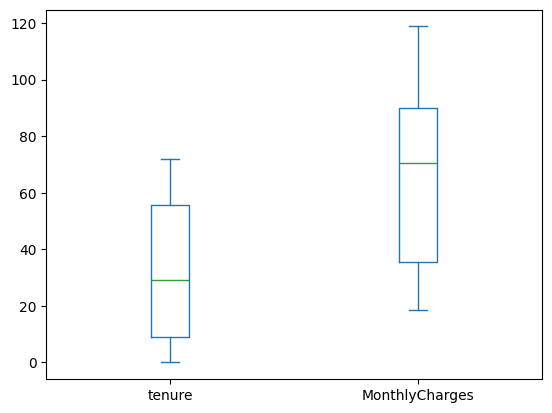

In [11]:
df[['tenure','MonthlyCharges']].plot.box()

 There are no outliers here for both the continuous data

In [12]:
df['TotalCharges']=df['TotalCharges'].astype(float)

ValueError: could not convert string to float: ' '

In [13]:
#we see there's an error which says can't convert ' ' to float
#Let's check how many rows have such entries
df[df['TotalCharges']==' ']
#If there aren't many we may drop all the entries rows with single space


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
350,4075-WKNIU,Female,No,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No
583,3213-VVOLG,Male,No,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
1592,2520-SGTTA,Female,No,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
4425,4472-LVYGI,Female,No,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
4747,4367-NUYAO,Male,No,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
4971,1371-DWPAZ,Female,No,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
5028,2775-SEFEE,Male,No,No,Yes,0,Yes,Yes,DSL,Yes,...,No,Yes,No,No,Two year,Yes,Bank transfer (automatic),61.90,,No
5260,7644-OMVMY,Male,No,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No


In [14]:
df['TotalCharges'].replace(' ', np.nan, inplace=True)
# we are replacing empty space data with numpy's nan
df.dropna(subset=['TotalCharges'], inplace=True)
# then we dropped the nan data
df.reset_index(drop=True, inplace=True)
# Then we reset the index so that there are no empty sequences in between

In [15]:
df['TotalCharges']=df['TotalCharges'].astype(float)

In [16]:
df.info()
# To check if the data type has converted to float

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5274 entries, 0 to 5273
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        5274 non-null   object 
 1   gender            5274 non-null   object 
 2   SeniorCitizen     5274 non-null   object 
 3   Partner           5274 non-null   object 
 4   Dependents        5274 non-null   object 
 5   tenure            5274 non-null   int64  
 6   PhoneService      5274 non-null   object 
 7   MultipleLines     5274 non-null   object 
 8   InternetService   5274 non-null   object 
 9   OnlineSecurity    5274 non-null   object 
 10  OnlineBackup      5274 non-null   object 
 11  DeviceProtection  5274 non-null   object 
 12  TechSupport       5274 non-null   object 
 13  StreamingTV       5274 non-null   object 
 14  StreamingMovies   5274 non-null   object 
 15  Contract          5274 non-null   object 
 16  PaperlessBilling  5274 non-null   object 


In [17]:
df.describe()

,tenure,MonthlyCharges,TotalCharges
count,5274.000000,5274.000000,5274.000000
mean,32.412021,64.891524,2295.560343
std,24.613992,30.171427,2285.155724
min,1.000000,18.400000,18.850000
25%,9.000000,35.500000,395.162500
50%,29.000000,70.500000,1387.400000
75%,56.000000,90.000000,3847.062500
max,72.000000,118.750000,8684.800000


<Axes: >

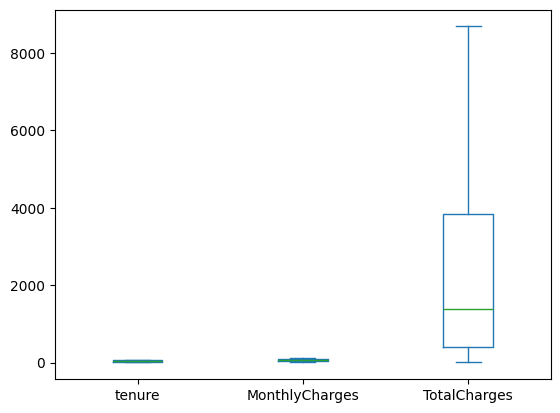

In [18]:
df[['tenure','MonthlyCharges','TotalCharges']].plot.box()

In [19]:
# Scaling the data - because total charges is very high as compared to other continuous variables
df['TotalCharges'] = df['TotalCharges']/100

<Axes: >

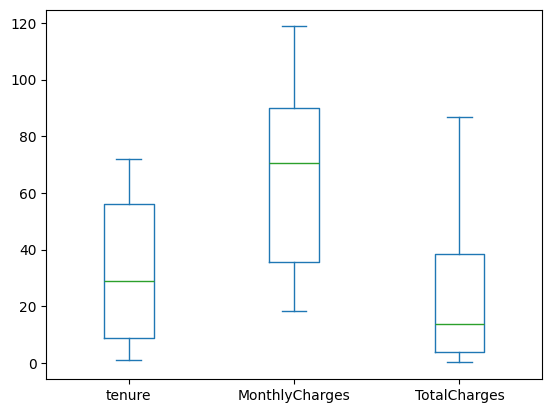

In [20]:
df[['tenure','MonthlyCharges','TotalCharges']].plot.box()

In [21]:
# Checking for number of duplicate rows
dups = df.duplicated()
print('No. of duplicate rows are %d' % (dups.sum()))

No. of duplicate rows are 0


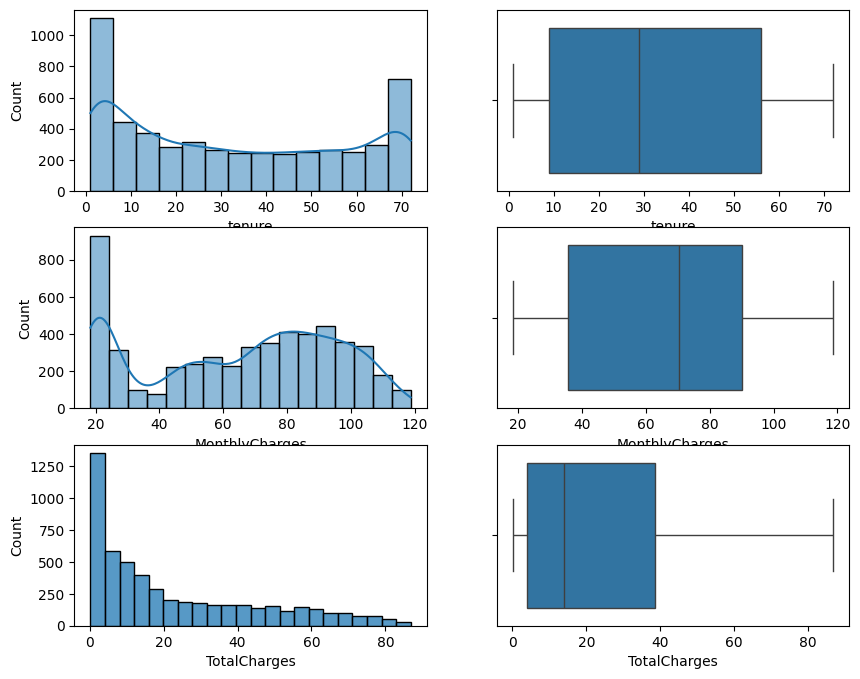

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a 3x2 grid of subplots
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(10, 8))

# Plot the histogram and boxplot for 'tenure'
sns.histplot(df['tenure'], kde=True, ax=axes[0][0])
sns.boxplot(x='tenure', data=df, ax=axes[0][1])

# Plot the histogram and boxplot for 'MonthlyCharges'
sns.histplot(df['MonthlyCharges'], kde=True, ax=axes[1][0])
sns.boxplot(x='MonthlyCharges', data=df, ax=axes[1][1])

# Plot the histogram and boxplot for 'TotalCharges'
sns.histplot(df['TotalCharges'], kde=False, ax=axes[2][0])
sns.boxplot(x='TotalCharges', data=df, ax=axes[2][1])

# Show the plots
plt.show()
#ax=axes[x][y] tells its position when displayed - like axes[0][0] is the 1st row 1st column axes[0][1] is 1st row 2nd column
# In the context of data visualization and statistics, "KDE" stands for Kernel Density Estimation. 
# Kernel Density Estimation is a non-parametric way to estimate the probability density function of a continuous random variable. 
#It is used to visualize the distribution of data in a smooth and continuous manner, 
# providing a smoother representation of the data's underlying probability density compared to traditional histograms.
# KDE plots are particularly useful when you want to understand the underlying shape of a distribution and identify modes or peaks in the data. 
# They can be a valuable tool for data exploration and analysis.

In [23]:
# Clearly no outliers

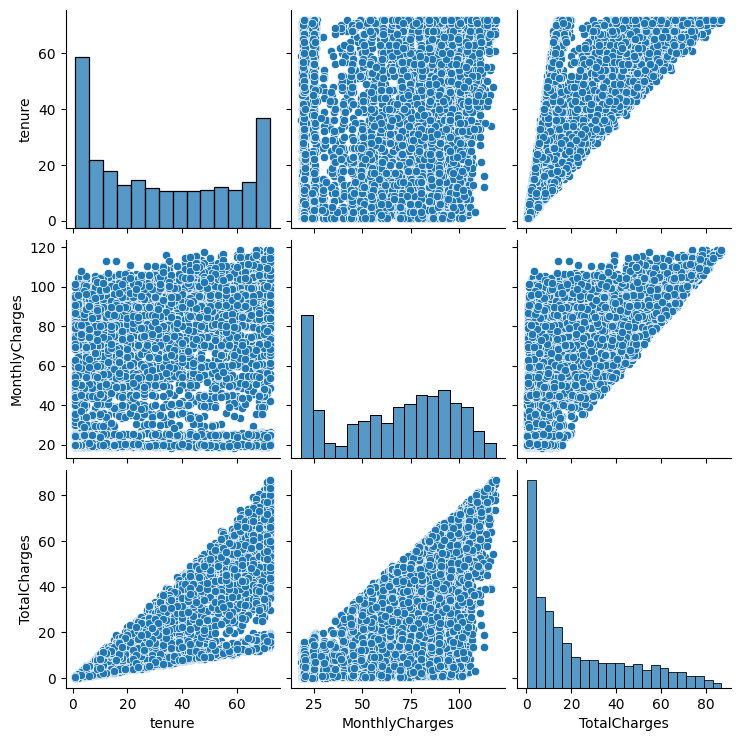

In [24]:
sns.pairplot(df)

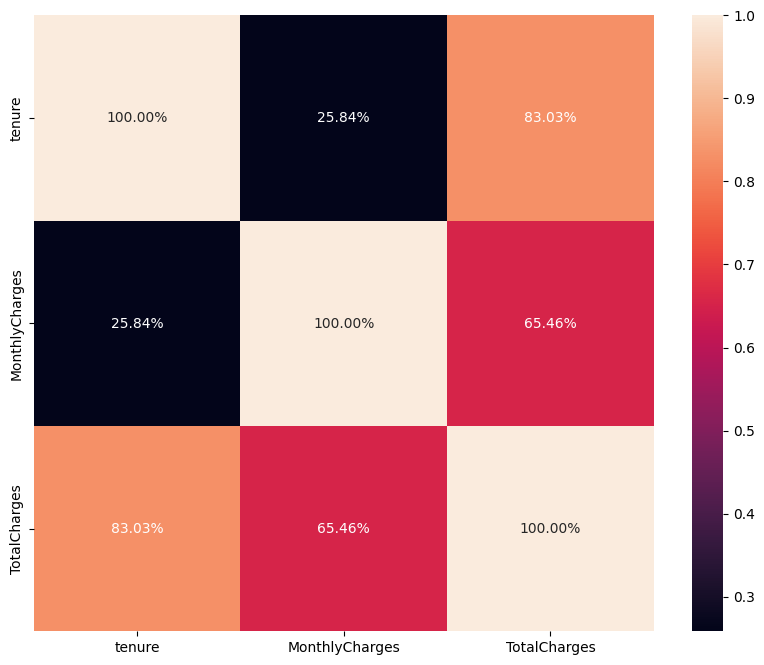

In [25]:
#Correlation matrix using heatmap
numeric_df = df.select_dtypes(include=[np.number])
correlation_matrix = numeric_df.corr()
# By importing numpy as np, you can use np.number to correctly identify numeric data types when selecting columns from your DataFrame.
# Create a figure and specify the size of the heatmap
plt.figure(figsize=(10, 8))

# Create a correlation matrix heatmap with annotations and a specific format for the annotations
sns.heatmap(correlation_matrix, annot=True, fmt=".2%")

# Show the heatmap
plt.show()


In [26]:
# Tenure and total charges & monthly charges and total charges are highly correlated

## Data preparation (outlier treatment)

In [27]:
#Scaling
# Here, we'll segragate the numerical and categorical data into individual dataframes.
cat=[]
num=[]
for i in df.columns:
    if df[i].dtype=='object':
        cat.append(i)
    else:
        num.append(i)
print(cat)
print(num)

['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']
['tenure', 'MonthlyCharges', 'TotalCharges']


In [28]:
# Now, we'll check for skewness and kurtosid which must lie between -1 and 1
print('The skewness for tenure is ',df['tenure'].skew())
print('The skewness for Monthly Charges is ',df['MonthlyCharges'].skew())
print('The skewness for Total Charges is ',df['TotalCharges'].skew())
print('The kurtosis for tenure is ',df['tenure'].kurtosis())
print('The kurtosis for Monthly Charges is ',df['MonthlyCharges'].kurtosis())
print('The kurtosis for Total Charges is ',df['TotalCharges'].kurtosis())

The skewness for tenure is  0.24238749110502886
The skewness for Monthly Charges is  -0.22069489393996322
The skewness for Total Charges is  0.9517662445097254
The kurtosis for tenure is  -1.3885043581171552
The kurtosis for Monthly Charges is  -1.2634997635967198
The kurtosis for Total Charges is  -0.26373908548816294


In [29]:
# The range of skenwss is close to the expected range of -1 to 1.
# There's a scope of transformation due to low kutosis - possibly square trnasformation to increase peakedness of the data 
# especially for tenure and monthly charges

### Model Building

1. Split the `train.csv` data into training and validation sets.
2. Try different algorithms like Logistic Regression, Random Forest, and Gradient Boosting to train the model.
3. Tune hyperparameters for better performance.

We'll start with one hot encoding

In [30]:
#we can drop the customer id column before creating dummies
#because dummies are not needed for data analysis and prediction
df=df.drop('customerID', axis=1)

In [31]:
df.describe(include='all')

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,5274,5274,5274,5274,5274.000000,5274,5274,5274,5274,5274,5274,5274,5274,5274,5274,5274,5274,5274.000000,5274.000000,5274
unique,2,2,2,2,NaN,2,3,3,3,3,3,3,3,3,3,2,4,NaN,NaN,2
top,Male,No,No,No,NaN,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,NaN,NaN,No
freq,2653,4418,2748,3713,NaN,4746,2517,2323,2617,2299,2304,2585,2075,2073,2907,3130,1772,NaN,NaN,3872
mean,NaN,NaN,NaN,NaN,32.412021,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64.891524,22.955603,NaN
std,NaN,NaN,NaN,NaN,24.613992,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.171427,22.851557,NaN
min,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.400000,0.188500,NaN
25%,NaN,NaN,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.500000,3.951625,NaN
50%,NaN,NaN,NaN,NaN,29.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.500000,13.874000,NaN
75%,NaN,NaN,NaN,NaN,56.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,90.000000,38.470625,NaN


In [32]:
for column in df.columns :
    if df[column].dtype=='object' :
        print(column.upper(),': ',df[column].nunique())
        print(df[column].value_counts(normalize=True).sort_values())
        print('\n')

GENDER :  2
gender
Female    0.496966
Male      0.503034
Name: proportion, dtype: float64


SENIORCITIZEN :  2
SeniorCitizen
Yes    0.162306
No     0.837694
Name: proportion, dtype: float64


PARTNER :  2
Partner
Yes    0.478953
No     0.521047
Name: proportion, dtype: float64


DEPENDENTS :  2
Dependents
Yes    0.29598
No     0.70402
Name: proportion, dtype: float64


PHONESERVICE :  2
PhoneService
No     0.100114
Yes    0.899886
Name: proportion, dtype: float64


MULTIPLELINES :  3
MultipleLines
No phone service    0.100114
Yes                 0.422639
No                  0.477247
Name: proportion, dtype: float64


INTERNETSERVICE :  3
InternetService
No             0.215965
DSL            0.343572
Fiber optic    0.440463
Name: proportion, dtype: float64


ONLINESECURITY :  3
OnlineSecurity
No internet service    0.215965
Yes                    0.287827
No                     0.496208
Name: proportion, dtype: float64


ONLINEBACKUP :  3
OnlineBackup
No internet service    0.215965
Ye

What we get here is pearson correlation coefficient
Pearson Correlation (r):
r = 1: Perfect positive correlation
0.7 ≤ |r| < 1: Strong positive correlation
0.4 ≤ |r| < 0.7: Moderate positive correlation
0.2 ≤ |r| < 0.4: Weak positive correlation
|r| < 0.2: Very weak or no correlation

In [33]:
# Also we'll now get dummies 
df = pd.get_dummies(df,drop_first=True)

In [34]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5274 entries, 0 to 5273
Data columns (total 31 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   tenure                                 5274 non-null   int64  
 1   MonthlyCharges                         5274 non-null   float64
 2   TotalCharges                           5274 non-null   float64
 3   gender_Male                            5274 non-null   bool   
 4   SeniorCitizen_Yes                      5274 non-null   bool   
 5   Partner_Yes                            5274 non-null   bool   
 6   Dependents_Yes                         5274 non-null   bool   
 7   PhoneService_Yes                       5274 non-null   bool   
 8   MultipleLines_No phone service         5274 non-null   bool   
 9   MultipleLines_Yes                      5274 non-null   bool   
 10  InternetService_Fiber optic            5274 non-null   bool   
 11  Inte

,tenure,MonthlyCharges,TotalCharges,gender_Male,SeniorCitizen_Yes,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes
0,72,53.65,37.8400,False,False,True,True,False,True,False,...,True,False,True,False,True,False,True,False,False,False
1,4,46.00,1.9360,False,False,False,False,True,False,False,...,False,False,False,False,False,True,False,False,True,True
2,56,21.20,12.3865,True,False,False,True,True,False,False,...,False,True,False,True,False,True,False,False,True,False
3,56,94.45,51.2460,True,False,False,False,True,False,True,...,False,False,True,False,False,True,False,True,False,True
4,9,79.55,7.2340,False,False,False,False,True,False,False,...,False,False,True,False,False,True,False,True,False,True


In [35]:
df.to_csv('need_only_data.csv', index = False)
# To export our datset to another csv file

# Prediction using Logistic Regression

In [36]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [37]:
y = df['Churn_Yes']
X = df.drop(['Churn_Yes','TotalCharges'], axis=1)
# dropping the Total charges column because it is highly correlated with both the other parameters tenure and TotalCharges

In [38]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=50,stratify=y)
# test size is percent of dataset used for testing, rest is uesd for traing
# Random_state=50 is ised to replicate the same result using the same testing and training dataset.
# Without this training and testing dataset change every time we use train_test_split.
# stratify = y is used to compute for y.

In [39]:
# Creating Instance
model = LogisticRegression(max_iter=10000)
# fit instance for training data
model.fit(X_train,y_train)

LogisticRegression(max_iter=10000)

In [40]:
model.intercept_

array([-0.52564788])

In [41]:
Prediction_test = model.predict(X_test)

In [42]:
Prediction_test

array([ True, False, False, ..., False, False, False])

In [43]:
Prediction_train = model.predict(X_train)

In [44]:
Prediction_train

array([ True, False,  True, ..., False, False, False])

In [45]:
#To check the performance

# Recall value is the success rate over the binary value of 1 - or yes, this different from accuracy
# Selecting the right sample if of utmost importance for binary prediction
from sklearn.metrics import classification_report
print('\nClassification report of test data')
print(classification_report(y_test,Prediction_test))
from sklearn.metrics import confusion_matrix
print('\nConfusion matrix for test data')
print(confusion_matrix(y_test, Prediction_test))
print('\nClassification report of train data')
print(classification_report(y_train,Prediction_train))
print('\nConfusion matrix for train data')
print(confusion_matrix(y_train, Prediction_train))


Classification report of test data
              precision    recall  f1-score   support

       False       0.85      0.90      0.87      1162
        True       0.66      0.55      0.60       421

    accuracy                           0.80      1583
   macro avg       0.75      0.72      0.73      1583
weighted avg       0.80      0.80      0.80      1583


Confusion matrix for test data
[[1040  122]
 [ 189  232]]

Classification report of train data
              precision    recall  f1-score   support

       False       0.85      0.89      0.87      2710
        True       0.65      0.55      0.60       981

    accuracy                           0.80      3691
   macro avg       0.75      0.72      0.73      3691
weighted avg       0.80      0.80      0.80      3691


Confusion matrix for train data
[[2423  287]
 [ 438  543]]


# Prediction using Decision trees

In [46]:
#Importing Deciosn Tree
from sklearn.tree import DecisionTreeClassifier
# Intitializing decision tree
dt_model = DecisionTreeClassifier(criterion='gini')

In [47]:
dt_model.fit(X_train, y_train)

DecisionTreeClassifier()

In [48]:
#To visualize the decision tree 
#from sklearn import tree
#train_char_label = ['No','Yes']
#Id_tree_file = open('Id_tree_file.dot','w')
#dot_data = tree.export_graphviz(dt_model,
#                               out_file=Id_tree_file,
 #                              feature_names = list(X_train),
  #                             class_names = list(train_char_label))
#Id_tree_file.close()

In [49]:
# Variable importance

In [50]:
pd.DataFrame(dt_model.feature_importances_).head()

,0
0,0.292767
1,0.265307
2,0.028899
3,0.021009
4,0.025175


In [51]:
pd.DataFrame(dt_model.feature_importances_,columns=['Imp'],index=X_train.columns).sort_values('Imp',ascending=False)

,Imp
tenure,0.292767
MonthlyCharges,0.265307
InternetService_Fiber optic,0.107421
gender_Male,0.028899
Partner_Yes,0.025175
Dependents_Yes,0.024494
PaperlessBilling_Yes,0.024106
PaymentMethod_Electronic check,0.023830
OnlineSecurity_Yes,0.022114
SeniorCitizen_Yes,0.021009


In [52]:
#Predictions
# On training data
y_pred_train = dt_model.predict(X_train)

In [53]:
y_pred_train

array([ True,  True,  True, ...,  True, False, False])

In [54]:
# On testing data
y_pred_test = dt_model.predict(X_test)

In [55]:
y_pred_test

array([ True, False, False, ..., False, False, False])

In [56]:
print('\nClassification report of training data')
print(classification_report(y_train,y_pred_train))
print('\nConfusion matrix for train data')
print(confusion_matrix(y_train, y_pred_train))
print('\nClassification report of test data')
print(classification_report(y_test,y_pred_test))
print('\nConfusion matrix for test data')
print(confusion_matrix(y_test, y_pred_test))


Classification report of training data
              precision    recall  f1-score   support

       False       1.00      1.00      1.00      2710
        True       1.00      0.99      1.00       981

    accuracy                           1.00      3691
   macro avg       1.00      1.00      1.00      3691
weighted avg       1.00      1.00      1.00      3691


Confusion matrix for train data
[[2710    0]
 [   6  975]]

Classification report of test data
              precision    recall  f1-score   support

       False       0.83      0.80      0.81      1162
        True       0.49      0.53      0.51       421

    accuracy                           0.73      1583
   macro avg       0.66      0.67      0.66      1583
weighted avg       0.74      0.73      0.73      1583


Confusion matrix for test data
[[928 234]
 [196 225]]


# Predictions using Random Forest Method

In [57]:
from sklearn.ensemble import RandomForestClassifier

In [58]:
rdf_model = RandomForestClassifier(n_estimators = 400, max_features=40,random_state=50)

In [59]:
rdf_model.fit(X_train,y_train)

RandomForestClassifier(max_features=40, n_estimators=400, random_state=50)

In [60]:
y_pred_rdf_train = rdf_model.predict(X_train)

In [61]:
y_pred_rdf_train

array([ True,  True,  True, ...,  True, False, False])

In [62]:
y_pred_rdf_test = rdf_model.predict(X_test)

In [63]:
y_pred_rdf_test

array([ True, False, False, ..., False,  True, False])

In [64]:
print('\nClassification report of training data')
print(classification_report(y_train,y_pred_rdf_train))
print('\nConfusion matrix for train data')
print(confusion_matrix(y_train, y_pred_rdf_train))
print('\nClassification report of test data')
print(classification_report(y_test,y_pred_rdf_test))
print('\nConfusion matrix for test data')
print(confusion_matrix(y_test, y_pred_rdf_test))


Classification report of training data
              precision    recall  f1-score   support

       False       1.00      1.00      1.00      2710
        True       1.00      1.00      1.00       981

    accuracy                           1.00      3691
   macro avg       1.00      1.00      1.00      3691
weighted avg       1.00      1.00      1.00      3691


Confusion matrix for train data
[[2708    2]
 [   4  977]]

Classification report of test data
              precision    recall  f1-score   support

       False       0.82      0.89      0.86      1162
        True       0.61      0.48      0.53       421

    accuracy                           0.78      1583
   macro avg       0.72      0.68      0.69      1583
weighted avg       0.77      0.78      0.77      1583


Confusion matrix for test data
[[1034  128]
 [ 221  200]]


# Now we'll proceed to do the feature engineering in the set we have to predict

In [65]:
df1 = pd.read_csv('active_customers.csv')

In [66]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1761 entries, 0 to 1760
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        1761 non-null   object 
 1   gender            1761 non-null   object 
 2   SeniorCitizen     1761 non-null   int64  
 3   Partner           1761 non-null   object 
 4   Dependents        1761 non-null   object 
 5   tenure            1761 non-null   int64  
 6   PhoneService      1761 non-null   object 
 7   MultipleLines     1761 non-null   object 
 8   InternetService   1761 non-null   object 
 9   OnlineSecurity    1761 non-null   object 
 10  OnlineBackup      1761 non-null   object 
 11  DeviceProtection  1761 non-null   object 
 12  TechSupport       1761 non-null   object 
 13  StreamingTV       1761 non-null   object 
 14  StreamingMovies   1761 non-null   object 
 15  Contract          1761 non-null   object 
 16  PaperlessBilling  1761 non-null   object 


In [69]:
for column in df1.columns :
    if df1[column].dtype=='object' :
        print(column.upper(),': ',df1[column].nunique())
        print(df1[column].value_counts(normalize=True).sort_values())
        print('\n')

CUSTOMERID :  1761
customerID
5343-SGUBI    0.000568
8245-UMPYT    0.000568
5366-OBVMR    0.000568
1187-WILMM    0.000568
0537-QYZZN    0.000568
                ...   
3237-AJGEH    0.000568
4962-CHQPW    0.000568
9755-JHNMN    0.000568
0463-WZZKO    0.000568
6704-UTUKK    0.000568
Name: proportion, Length: 1761, dtype: float64


GENDER :  2
gender
Female    0.490062
Male      0.509938
Name: proportion, dtype: float64


SENIORCITIZEN :  2
SeniorCitizen
Yes    0.162408
No     0.837592
Name: proportion, dtype: float64


PARTNER :  2
Partner
Yes    0.49347
No     0.50653
Name: proportion, dtype: float64


DEPENDENTS :  2
Dependents
Yes    0.307212
No     0.692788
Name: proportion, dtype: float64


PHONESERVICE :  2
PhoneService
No     0.086315
Yes    0.913685
Name: proportion, dtype: float64


MULTIPLELINES :  3
MultipleLines
No phone service    0.086315
Yes                 0.419080
No                  0.494605
Name: proportion, dtype: float64


INTERNETSERVICE :  3
InternetService
No    

In [70]:
# Replace values in the 'SeniorCitizen' column
df1['SeniorCitizen'] = df1['SeniorCitizen'].replace({0: 'No', 1: 'Yes'})

In [71]:
df1.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
dtype: int64

In [72]:
df1['TotalCharges']=df1['TotalCharges'].astype(float)

ValueError: could not convert string to float: ' '

In [73]:
df1[df1['TotalCharges']==' ']

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
74,2923-ARZLG,Male,No,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,
252,3115-CZMZD,Male,No,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,
814,5709-LVOEQ,Female,No,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,


In [74]:
df1['TotalCharges'].replace(' ', np.nan, inplace=True)
df1.dropna(subset=['TotalCharges'], inplace=True)
df1.reset_index(drop=True, inplace=True)

In [75]:
df1['TotalCharges']=df1['TotalCharges'].astype(float)

In [76]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1758 entries, 0 to 1757
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        1758 non-null   object 
 1   gender            1758 non-null   object 
 2   SeniorCitizen     1758 non-null   object 
 3   Partner           1758 non-null   object 
 4   Dependents        1758 non-null   object 
 5   tenure            1758 non-null   int64  
 6   PhoneService      1758 non-null   object 
 7   MultipleLines     1758 non-null   object 
 8   InternetService   1758 non-null   object 
 9   OnlineSecurity    1758 non-null   object 
 10  OnlineBackup      1758 non-null   object 
 11  DeviceProtection  1758 non-null   object 
 12  TechSupport       1758 non-null   object 
 13  StreamingTV       1758 non-null   object 
 14  StreamingMovies   1758 non-null   object 
 15  Contract          1758 non-null   object 
 16  PaperlessBilling  1758 non-null   object 


In [77]:
df1.describe()

,tenure,MonthlyCharges,TotalCharges
count,1758.000000,1758.000000,1758.000000
mean,32.451081,64.518259,2246.520734
std,24.344839,29.834930,2210.932852
min,1.000000,18.250000,18.800000
25%,9.000000,35.825000,418.525000
50%,29.000000,69.950000,1423.500000
75%,55.000000,89.600000,3576.012500
max,72.000000,116.800000,8496.700000


<Axes: >

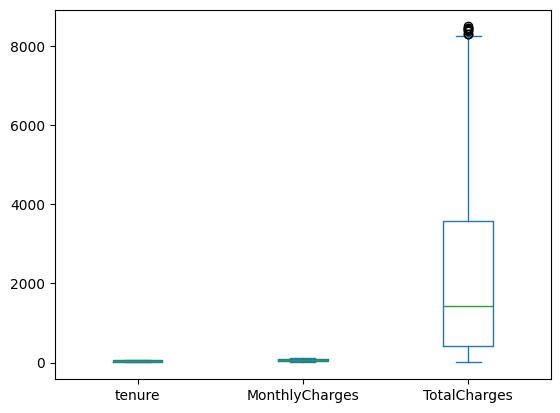

In [78]:
df1[['tenure','MonthlyCharges','TotalCharges']].plot.box()

Scaling the data

In [79]:
df1['TotalCharges'] = df1['TotalCharges']/100

<Axes: >

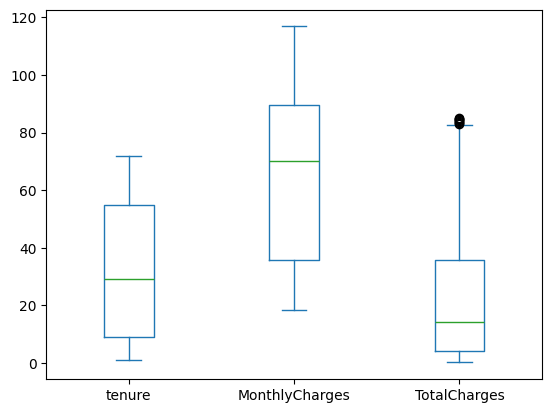

In [80]:
df1[['tenure','MonthlyCharges','TotalCharges']].plot.box()

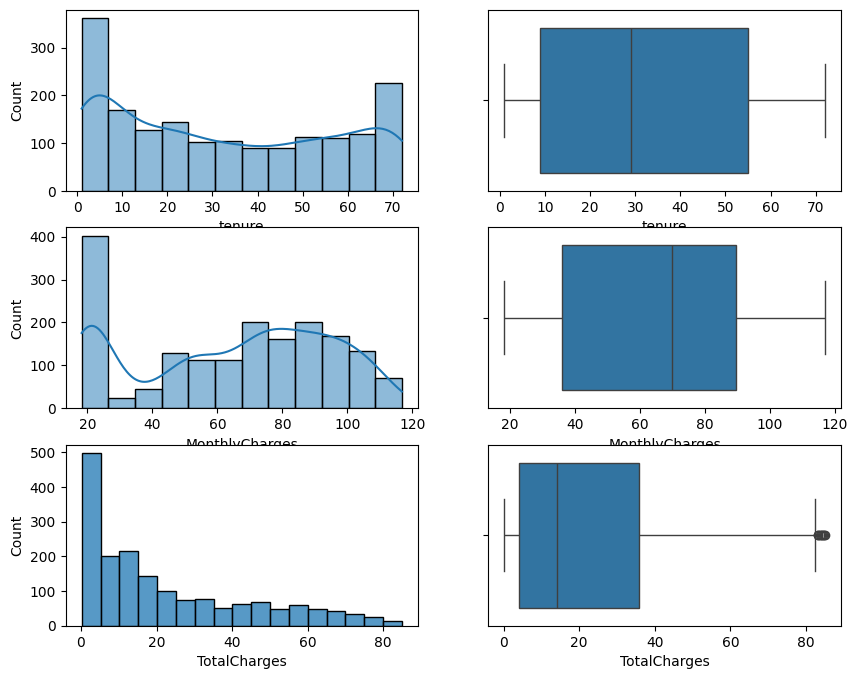

In [81]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(10, 8))

# Plot the histogram and boxplot for 'tenure'
sns.histplot(df1['tenure'], kde=True, ax=axes[0][0])
sns.boxplot(x='tenure', data=df1, ax=axes[0][1])

# Plot the histogram and boxplot for 'MonthlyCharges'
sns.histplot(df1['MonthlyCharges'], kde=True, ax=axes[1][0])
sns.boxplot(x='MonthlyCharges', data=df1, ax=axes[1][1])

# Plot the histogram and boxplot for 'TotalCharges'
sns.histplot(df1['TotalCharges'], kde=False, ax=axes[2][0])
sns.boxplot(x='TotalCharges', data=df1, ax=axes[2][1])

# Show the plots
plt.show()

In [82]:
# Outlier treatment for total charges is needed
def remove_outlier(col):
    sorted(col)
    Q1, Q3 = np.percentile(col,[25,75])
    IQR = Q3-Q1
    lower_range = Q1-(1.5*IQR)
    upper_range = Q3+(1.5*IQR)
    return lower_range, upper_range

In [83]:
column = 'TotalCharges'  # Replace with your column name
lr, ur = remove_outlier(df1[column])

# Update the column values
df1[column] = np.where(df1[column] > ur, ur, df1[column])
df1[column] = np.where(df1[column] < lr, lr, df1[column])

<Axes: >

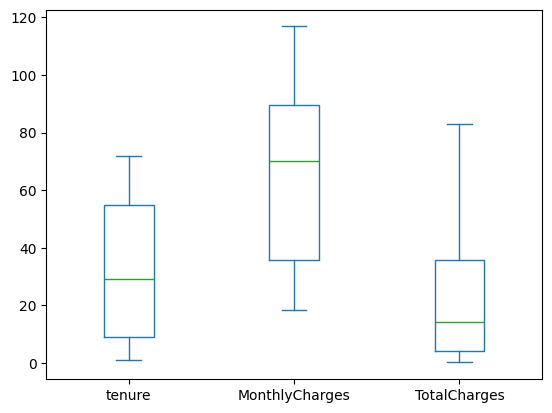

In [84]:
df1[['tenure','MonthlyCharges','TotalCharges']].plot.box()

 No outliers now

In [85]:
# Checking for number of duplicate rows
dups = df1.duplicated()
print('No. of duplicate rows are %d' % (dups.sum()))

No. of duplicate rows are 0


In [86]:
print('The skewness for tenure is ',df1['tenure'].skew())
print('The skewness for Monthly Charges is ',df1['MonthlyCharges'].skew())
print('The skewness for Total Charges is ',df1['TotalCharges'].skew())
print('The kurtosis for tenure is ',df1['tenure'].kurtosis())
print('The kurtosis for Monthly Charges is ',df1['MonthlyCharges'].kurtosis())
print('The kurtosis for Total Charges is ',df1['TotalCharges'].kurtosis())

The skewness for tenure is  0.2235291524502344
The skewness for Monthly Charges is  -0.22732384861650706
The skewness for Total Charges is  0.9887964154480428
The kurtosis for tenure is  -1.3867144777985678
The kurtosis for Monthly Charges is  -1.2341619949036984
The kurtosis for Total Charges is  -0.14299644260780164


In [87]:
# There's a scope for transformation here too due to negative kurtosis

In [88]:
seq = df1['customerID']
# So that we concatenate the id with results since the order remains same

In [89]:
df1=df1.drop('customerID', axis=1)

In [90]:
for column in df1.columns :
    if df1[column].dtype=='object' :
        print(column.upper(),': ',df1[column].nunique())
        print(df1[column].value_counts(normalize=True).sort_values())
        print('\n')

GENDER :  2
gender
Female    0.49033
Male      0.50967
Name: proportion, dtype: float64


SENIORCITIZEN :  2
SeniorCitizen
Yes    0.162685
No     0.837315
Name: proportion, dtype: float64


PARTNER :  2
Partner
Yes    0.493174
No     0.506826
Name: proportion, dtype: float64


DEPENDENTS :  2
Dependents
Yes    0.30603
No     0.69397
Name: proportion, dtype: float64


PHONESERVICE :  2
PhoneService
No     0.086462
Yes    0.913538
Name: proportion, dtype: float64


MULTIPLELINES :  3
MultipleLines
No phone service    0.086462
Yes                 0.419795
No                  0.493743
Name: proportion, dtype: float64


INTERNETSERVICE :  3
InternetService
No             0.216724
DSL            0.343572
Fiber optic    0.439704
Name: proportion, dtype: float64


ONLINESECURITY :  3
OnlineSecurity
No internet service    0.216724
Yes                    0.282708
No                     0.500569
Name: proportion, dtype: float64


ONLINEBACKUP :  3
OnlineBackup
No internet service    0.216724
Yes 

In [91]:
# No bad data

In [92]:
# First we'll segragate the numerical and categorical data into individual dataframes and then scale the numerical ones
cat1=[]
num1=[]
for i in df1.columns:
    if df1[i].dtype=='object':
        cat1.append(i)
    else:
        num1.append(i)
print(cat1)
print(num1)

['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']
['tenure', 'MonthlyCharges', 'TotalCharges']


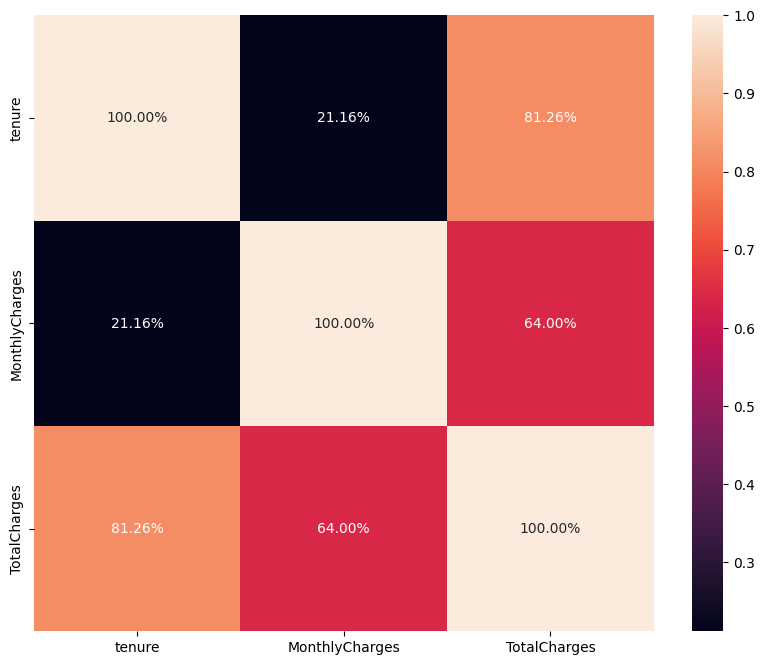

In [93]:
# Create a figure and specify the size of the heatmap
plt.figure(figsize=(10, 8))

# Create a correlation matrix heatmap with annotations and a specific format for the annotations
sns.heatmap(df1[num1].corr(), annot=True, fmt=".2%")

# Show the heatmap
plt.show()

Since TotalCharges is highly correlated with other two parameters we'll drop it for further analysis.

In [94]:
df1=df1.drop('TotalCharges',axis=1)

In [95]:
df1.to_csv('need_only_data1.csv', index = False)
# To export our datset to another csv file

In [96]:
# We'll now get dummies
df1 = pd.get_dummies(df1,drop_first=True)

In [97]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1758 entries, 0 to 1757
Data columns (total 29 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   tenure                                 1758 non-null   int64  
 1   MonthlyCharges                         1758 non-null   float64
 2   gender_Male                            1758 non-null   bool   
 3   SeniorCitizen_Yes                      1758 non-null   bool   
 4   Partner_Yes                            1758 non-null   bool   
 5   Dependents_Yes                         1758 non-null   bool   
 6   PhoneService_Yes                       1758 non-null   bool   
 7   MultipleLines_No phone service         1758 non-null   bool   
 8   MultipleLines_Yes                      1758 non-null   bool   
 9   InternetService_Fiber optic            1758 non-null   bool   
 10  InternetService_No                     1758 non-null   bool   
 11  Onli

# Prediction using Logistic Regression

In [98]:
prediction_LR = model.predict(df1)
for index, prediction in enumerate(prediction_LR):
    print(f"Row {index}: Prediction = {prediction}")


Row 0: Prediction = False
Row 1: Prediction = False
Row 2: Prediction = False
Row 3: Prediction = True
Row 4: Prediction = False
Row 5: Prediction = True
Row 6: Prediction = False
Row 7: Prediction = False
Row 8: Prediction = False
Row 9: Prediction = True
Row 10: Prediction = True
Row 11: Prediction = False
Row 12: Prediction = True
Row 13: Prediction = False
Row 14: Prediction = False
Row 15: Prediction = False
Row 16: Prediction = False
Row 17: Prediction = False
Row 18: Prediction = False
Row 19: Prediction = True
Row 20: Prediction = False
Row 21: Prediction = False
Row 22: Prediction = False
Row 23: Prediction = False
Row 24: Prediction = False
Row 25: Prediction = False
Row 26: Prediction = False
Row 27: Prediction = False
Row 28: Prediction = False
Row 29: Prediction = True
Row 30: Prediction = True
Row 31: Prediction = False
Row 32: Prediction = False
Row 33: Prediction = False
Row 34: Prediction = True
Row 35: Prediction = False
Row 36: Prediction = False
Row 37: Prediction =

# Prediction using Decision Tree Algorithm

In [99]:
prediction_DT = dt_model.predict(df1)
for index, prediction in enumerate(prediction_DT):
    print(f"Row {index}: Prediction = {prediction}")

Row 0: Prediction = False
Row 1: Prediction = False
Row 2: Prediction = False
Row 3: Prediction = True
Row 4: Prediction = False
Row 5: Prediction = True
Row 6: Prediction = False
Row 7: Prediction = False
Row 8: Prediction = True
Row 9: Prediction = True
Row 10: Prediction = True
Row 11: Prediction = False
Row 12: Prediction = True
Row 13: Prediction = False
Row 14: Prediction = False
Row 15: Prediction = True
Row 16: Prediction = False
Row 17: Prediction = False
Row 18: Prediction = False
Row 19: Prediction = True
Row 20: Prediction = False
Row 21: Prediction = False
Row 22: Prediction = False
Row 23: Prediction = False
Row 24: Prediction = False
Row 25: Prediction = False
Row 26: Prediction = False
Row 27: Prediction = False
Row 28: Prediction = False
Row 29: Prediction = True
Row 30: Prediction = True
Row 31: Prediction = True
Row 32: Prediction = False
Row 33: Prediction = False
Row 34: Prediction = False
Row 35: Prediction = False
Row 36: Prediction = False
Row 37: Prediction = F

# Prediction using Random Forest Algorithm

In [100]:
prediction_RDF = rdf_model.predict(df1)
for index, prediction in enumerate(prediction_RDF):
    print(f"Row {index}: Prediction = {prediction}")

Row 0: Prediction = False
Row 1: Prediction = False
Row 2: Prediction = False
Row 3: Prediction = True
Row 4: Prediction = False
Row 5: Prediction = True
Row 6: Prediction = False
Row 7: Prediction = False
Row 8: Prediction = False
Row 9: Prediction = True
Row 10: Prediction = True
Row 11: Prediction = False
Row 12: Prediction = False
Row 13: Prediction = False
Row 14: Prediction = False
Row 15: Prediction = False
Row 16: Prediction = False
Row 17: Prediction = False
Row 18: Prediction = False
Row 19: Prediction = True
Row 20: Prediction = True
Row 21: Prediction = False
Row 22: Prediction = False
Row 23: Prediction = False
Row 24: Prediction = False
Row 25: Prediction = False
Row 26: Prediction = False
Row 27: Prediction = False
Row 28: Prediction = False
Row 29: Prediction = False
Row 30: Prediction = True
Row 31: Prediction = False
Row 32: Prediction = False
Row 33: Prediction = False
Row 34: Prediction = True
Row 35: Prediction = False
Row 36: Prediction = False
Row 37: Prediction 

# Combining the data and exporting it 

In [101]:
Fincal_file = []

In [102]:
# Create a DataFrame by combining the lists
Final_file = {'Customer_Id': seq, 'prediction_RDF': prediction_RDF, 'prediction_DT': prediction_DT, 'prediction_LR': prediction_LR}
result_df = pd.DataFrame(Final_file)
# Exporting the DataFrame to a CSV file
result_df.to_csv('result1.csv', index=False)
